In [1]:
import pandas as pd
import numpy as np
import requests
import os
import glob
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt


# GATHERING DATA


**1.- Download The WeRateDogs Twitter archive**

In [2]:
#download file and explore it:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
df.shape

(2356, 17)

**2.- Gathering the tweet image predictions**

In [4]:
# Create a folder called Image Predictions:

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Request the url with get:

url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#To get sure the HTTP is 200 (suceed in the request) 
#and to see the content of it
response

<Response [200]>

In [5]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:
# Save this file to the computer:
with open (os.path.join(folder_name, 
                        url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
#check the content of the folder:   
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Put my file in a pandas data frame format:
img_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

tweet_id                                          jpg_url  \
1128  727685679342333952  https://pbs.twimg.com/media/ChlCQg-VIAQ_8g4.jpg   
517   676440007570247681  https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg   
232   670417414769758208  https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg   
242   670449342516494336  https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg   
139   668542336805281792  https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg   

      img_num                              p1   p1_conf  p1_dog  \
1128        1                   Border_collie  0.462408    True   
517         2                     Maltese_dog  0.579472    True   
232         1                      sea_urchin  0.493257   False   
242         1                         peacock  0.999924   False   
139         1  American_Staffordshire_terrier  0.267695    True   

                      p2   p2_conf  p2_dog                         p3  \
1128              collie  0.214556    True                 Eskimo_dog   
517           toy_poodle  0.133446    True                   Shih-Tzu   
232            porcupine  0.460565   False                    cardoon   
242   European_gallinule  0.000030   False                      agama   
139       French_bulldog  0.254050    True  Staffordshire_bullterrier   

       p3_conf  p3_dog  
1128  0.035604    True  
517   0.094397    True  
232   0.008146   False  
242   0.000022   False  
139   0.212381    True

**3.- QUERY THE TWITTER API**

In [8]:
#credentials for entering:
consumer_key = '<put here your API Key>'
consumer_secret = '<put here your API Key Secret>'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api_client = tweepy.API(auth)


In [9]:

#query the Twitter API for each tweet's JSON data using the tweet IDs

import json
from tweepy.error import TweepError, RateLimitError

tweets = []
for index, tweet in df.iterrows():
    try:
        tweet_status = api_client.get_status(tweet["tweet_id"])
        tweets.append(tweet_status._json)
        
    except RateLimitError as e:
        print("Rate Limit excedeed. We are going to stop collecting data here!")
        break
    except TweepError as e:
        print(f"API Error {str(e)}")
        pass
    except Exception as e:
        print(f"Uknown Error {str(e)}")
        break

with open('tweet_json.json', mode='w') as f: 
    f.write(json.dumps(tweets))

API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 144, 'message': 'No status found with that ID.'}]
API Error [{'code': 

In [10]:
# Store each tweet's entire set of Jason  data in Tweet_json.txt:

tweet_df = pd.read_json('tweet_json.json', convert_dates=True)
tweet_df.head()


created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   
1 2017-08-01 00:17:27+00:00  892177421306343426  892177421306343424   
2 2017-07-31 00:18:03+00:00  891815181378084864  891815181378084864   
3 2017-07-30 15:58:51+00:00  891689557279858688  891689557279858688   
4 2017-07-29 16:00:24+00:00  891327558926688256  891327558926688256   

                                                text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   
1  This is Tilly. She's just checking pup on you....       True   
2  This is Archie. He is a rare Norwegian Pouncin...       True   
3  This is Darla. She commenced a snooze mid meal...      False   
4  This is Franklin. He would like you to stop ca...       True   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   
1                                                NaN   
2                                                NaN   
3  {'media': [{'id': 891689552724799489, 'id_str'...   
4                                                NaN   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   
1  <a href="http://twitter.com/download/iphone" r...                    NaN   
2  <a href="http://twitter.com/download/iphone" r...                    NaN   
3  <a href="http://twitter.com/download/iphone" r...                    NaN   
4  <a href="http://twitter.com/download/iphone" r...                    NaN   

   in_reply_to_status_id_str  ...  favorite_count  favorited retweeted  \
0                        NaN  ...           35179      False     False   
1                        NaN  ...           30445      False     False   
2                        NaN  ...           22894      False     False   
3                        NaN  ...           38471      False     False   
4                        NaN  ...           36738      False     False   

  possibly_sensitive  possibly_sensitive_appealable  lang retweeted_status  \
0                0.0                            0.0    en              NaN   
1                0.0                            0.0    en              NaN   
2                0.0                            0.0    en              NaN   
3                0.0                            0.0    en              NaN   
4                0.0                            0.0    en              NaN   

   quoted_status_id  quoted_status_id_str  quoted_status  
0               NaN                   NaN            NaN  
1               NaN                   NaN            NaN  
2               NaN                   NaN            NaN  
3               NaN                   NaN            NaN  
4               NaN                   NaN            NaN  

[5 rows x 30 columns]

In [11]:
# Save a copy of the data to a txt file as requested by exercise instruction
tweet_df.to_csv('tweet_df.txt',encoding='utf-8',index=False)

# Created a csv file in order to download and open without issues in Excel for visual inspection
tweet_df.to_csv('tweet_df.csv',encoding='utf-8',index=False)

# Assessing Data

In [12]:
# Fist make a copy of the 3 data frames to be  assessed and them cleaned
df_archive_clean = df.copy()
img_predictions_clean= img_predictions_df.copy()
tweet_clean = tweet_df.copy()


In [13]:
#from the tweet data frame I will select just the 3 column I am interested in assess,
#after having a look to the others, by now, they are not useful for my analysis

tweet_short = tweet_clean.filter(['id','retweet_count','favorite_count'], axis=1)

#I create a CSV in order to download it and explore it in excel: 
tweet_short.to_csv('tweet_short.csv',encoding='utf-8',index=False)

tweet_short.head()

id  retweet_count  favorite_count
0  892420643555336193           7428           35179
1  892177421306343426           5522           30445
2  891815181378084864           3646           22894
3  891689557279858688           7599           38471
4  891327558926688256           8181           36738

In [14]:
df_archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [15]:
img_predictions_clean

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [16]:
tweet_short

id  retweet_count  favorite_count
0    892420643555336193           7428           35179
1    892177421306343426           5522           30445
2    891815181378084864           3646           22894
3    891689557279858688           7599           38471
4    891327558926688256           8181           36738
..                  ...            ...             ...
872  759159934323924993           1128               0
873  759099523532779520           4043           14186
874  759047813560868866           1948            6333
875  758854675097526272            878            3467
876  758828659922702336           3751           10954

[877 rows x 3 columns]

## Visual Assessment

I downloaded the 3 files and explored them in Excel and in the tables above. I used scroll, filter and review of the columns names to do my analysis. 

## Programmatic Assessment
I used a range of methods from pandas to assess the data of the 3 dataframes. Mainly .info, .describe, .unique, .count_values, etc. 

**The results of both analysis is as follows:**

#### Quality:
1. There are 746 names missed, but cataloged at none, possible pandas misleading result for the None. 

2. In the prediction table, there are predictions of not dog breed. Not accurate data. 

3. Timestamp and retweeted_status_timestamp had incorrect data type (object instead of date time)

4. Rating denominator has extreme values: 110(1),120(1),130(1),150(1),170(1). I decided to consider extreme values over 100. They are possible outliers for visualizations and medias

5. Rating numerator also has extreme values: 420(2),666(1),960(1),1776(1). I decided to consider as extreme those over 400. 

6. There are 181 retweeted tweets, but we are only interested in analyzing  the originals. 

7. There are 78 replies to the tweets, and again, we are only interested in the original tweets. 

8. There are some tweets that do not have an image, when this is the core of our scope. 

9. The Source column in the Archive table is confusing, it is difficult to clearly see where the tweet comes from.


#### Tidiness:

1. Tweeter archive, Image prediction  and Twitter  short tables can be merged in one unique table, since they have one common column (tweet id)
2. Dog stage are 4 possible (doggo,pupper,floofer,puppo) and they are a variable, more than separate columns. 
3. Since the more accurate prediction in Image Prediction Table is the P1, we can drop the other  to facilitate analysis. 

**Programmatic analysis of the Twitter Archive table**

In [17]:


df_archive_clean.tail(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [18]:
df_archive_clean.sample()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2326  666411507551481857                    NaN                  NaN   

                      timestamp  \
2326  2015-11-17 00:24:19 +0000   

                                                 source  \
2326  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2326  This is quite the dog. Gets really excited whe...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2326                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2326  https://twitter.com/dog_rates/status/666411507...                 2   

      rating_denominator   name doggo floofer pupper puppo  
2326                  10  quite  None    None   None  None

In [19]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_archive_clean.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [21]:
df_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [22]:
df_archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
df_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
all_columns = pd.Series(list(df_archive_clean) + list(img_predictions_clean) + list(tweet_short))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

**Programmatic analysis of the Image prediction table**

In [25]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
img_predictions_clean.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [27]:
img_predictions_clean.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

**Programmatic analysis of the tweets short table**

In [28]:
tweet_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              877 non-null    int64
 1   retweet_count   877 non-null    int64
 2   favorite_count  877 non-null    int64
dtypes: int64(3)
memory usage: 20.7 KB


In [29]:
tweet_short.describe()

id  retweet_count  favorite_count
count  8.770000e+02     877.000000      877.000000
mean   8.200861e+17    4579.472064    13488.472064
std    3.693118e+16    5160.075402    14173.395881
min    7.588287e+17       1.000000        0.000000
25%    7.895309e+17    1906.000000     5090.000000
50%    8.185365e+17    3139.000000    10295.000000
75%    8.482137e+17    5382.000000    18961.000000
max    8.924206e+17   54647.000000   129396.000000

In [30]:
tweet_short.sample(5)

id  retweet_count  favorite_count
401  822489057087389700           6259           17834
480  813157409116065792           2172            7680
867  759793422261743616           1851            5821
800  770093767776997377           2973               0
415  820837357901512704           6585               0

# Cleaning Data

#### Merge 3 Dataframes in one Master dataframe
**Describe:**
+ Merge the 3 dataframes using `merge`. 
+ First we need to rename the `id`column in `tweet_short` table, so it can be merged with the others 2. 
+ We merge frist to tables toguether, ther the third one to the first merge. 

**Code:**

In [119]:
#change column name in Tweet_short df, 'id'

tweet_short= tweet_short.rename({'id': 'tweet_id'}, axis=1)


**Test**

In [120]:
tweet_short.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7428           35179
1  892177421306343426           5522           30445
2  891815181378084864           3646           22894
3  891689557279858688           7599           38471
4  891327558926688256           8181           36738

In [121]:

#merge 3 dataframes in one
master_df = pd.merge(df_archive_clean, tweet_short, on=['tweet_id','tweet_id'],how='left')

In [122]:
master_df = pd.merge(master_df, img_predictions_clean, on=['tweet_id'] , how='left')

**Test**

In [123]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Clean the column Name and replace None by NaN

**Describe:**
+ Replace the None values by NaN,in name, doggo, floofer, pupper and puppo columns,  so when using pandas in certain functions, the none won't be count as existing values, but as non-existing values. Use `replace`
+ Remove all the names starting with a lowercase letter, since they are not valuable names for us. Non accurate Data. Use `regex`


**Code**


In [124]:
#Change None by Nan values in all columns needed
master_df['name'].replace("None", np.nan, inplace=True)
master_df['floofer'].replace("None", np.nan, inplace=True)
master_df['doggo'].replace("None", np.nan, inplace=True)
master_df['pupper'].replace("None", np.nan, inplace=True)
master_df['puppo'].replace("None", np.nan, inplace=True)

**Test**

In [125]:
master_df.name.value_counts()

a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
             ..
Snoop         1
Genevieve     1
Farfle        1
Alejandro     1
Trip          1
Name: name, Length: 956, dtype: int64

In [126]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [127]:
#Delete all the rows with names starting with a lower case (assuming they are not accurate names)
master_df = master_df[~df['name'].str[0].str.islower().fillna(False)]

**Test**

In [128]:
master_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

In [129]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2247 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2247 non-null   object 
 4   source                      2247 non-null   object 
 5   text                        2247 non-null   object 
 6   retweeted_status_id         176 non-null    float64
 7   retweeted_status_user_id    176 non-null    float64
 8   retweeted_status_timestamp  176 non-null    object 
 9   expanded_urls               2188 non-null   object 
 10  rating_numerator            2247 non-null   int64  
 11  rating_denominator          2247 non-null   int64  
 12  name                        1502 non-null   object 
 13  doggo                       93 no

#### Change the 4 column (doggo,pupper, floofer, puppo) for just one variable: 'dog_stage'

**Describe:**
+ Merge the 4 columns for doggo,pupper,floofer and puppo as a Dog_state unique column. Then drop the variable. Use `melt`and `drop`. 

**Code:**

In [130]:

# Loc will allow to create the new column using NaN if any value is in the other 4 columns

master_df.loc[master_df['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
master_df.loc[master_df['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
master_df.loc[master_df['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
master_df.loc[master_df['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

In [131]:

# dropping the 4 columns we merged before
master_df = master_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

**Test**

In [132]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2247 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2247 non-null   object 
 4   source                      2247 non-null   object 
 5   text                        2247 non-null   object 
 6   retweeted_status_id         176 non-null    float64
 7   retweeted_status_user_id    176 non-null    float64
 8   retweeted_status_timestamp  176 non-null    object 
 9   expanded_urls               2188 non-null   object 
 10  rating_numerator            2247 non-null   int64  
 11  rating_denominator          2247 non-null   int64  
 12  name                        1502 non-null   object 
 13  retweet_count               862 n

#### Drop the prediction less accurate
**Describe:**
+ Drop predictions number 2 and 3 using `drop`

**Code**

In [133]:
master_df= master_df.drop(['p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis =1)


**Test**

In [134]:
master_df.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  ...  rating_denominator  \
0  https://twitter.com/dog_rates/status/892420643...  ...                  10   
1  https://twitter.com/dog_rates/status/892177421...  ...                  10   

      name retweet_count  favorite_count  \
0  Phineas        7428.0         35179.0   
1    Tilly        5522.0         30445.0   

                                           jpg_url img_num         p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg     1.0     orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg     1.0  Chihuahua   

    p1_conf  p1_dog dog_stage  
0  0.097049   False       NaN  
1  0.323581    True       NaN  

[2 rows x 21 columns]

#### Delete all the rows with a False value in p1_dog
**Describe:**
+ Delete all the rows where the prediction 1, the one we decided to keep, is not a dog, since those are  inaccurate values. 

**Code:**


In [135]:
master_df = master_df[master_df.p1_dog != False]

**Test**

In [136]:
master_df.p1_dog.value_counts()

True    1461
Name: p1_dog, dtype: int64

#### Change data type for Timestamp and retweeted_status_timestamp

**Describe**
+ Change Timestamp and retweeted_status_timestamp data typefrom object to datatime. Use `.to_date`

**Code**

In [137]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [138]:
# retweeted_status_timestamp in not going to be changed since it will be deleted in next steps

**Test**

In [139]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1733 entries, 1 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1733 non-null   int64              
 1   in_reply_to_status_id       69 non-null     float64            
 2   in_reply_to_user_id         69 non-null     float64            
 3   timestamp                   1733 non-null   datetime64[ns, UTC]
 4   source                      1733 non-null   object             
 5   text                        1733 non-null   object             
 6   retweeted_status_id         151 non-null    float64            
 7   retweeted_status_user_id    151 non-null    float64            
 8   retweeted_status_timestamp  151 non-null    object             
 9   expanded_urls               1674 non-null   object             
 10  rating_numerator            1733 non-null   int64           

#### Delete outliers from `Rating_denominator` and from `rating_numerator`
**Description**
+ Delete the extreme values, so when plotting in our EDA they do not disturb the results

**Code**

In [140]:
master_df = master_df[(master_df.rating_denominator != 110) & (master_df.rating_denominator != 120)& 
                       (df.rating_denominator != 130) & (master_df.rating_denominator != 150) 
                      & (master_df.rating_denominator != 170)]

<ipython-input-140-ff06e2ff980d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  master_df = master_df[(master_df.rating_denominator != 110) & (master_df.rating_denominator != 120)&


In [141]:
master_df = master_df[(master_df.rating_numerator != 420)& (master_df.rating_numerator != 666)& 
                      (master_df.rating_numerator != 960)& (master_df.rating_numerator != 1776)]

**Test**

In [142]:
master_df.rating_denominator.describe()

count    1727.000000
mean       10.243196
std         3.734362
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

In [143]:
master_df.rating_numerator.describe()

count    1727.000000
mean       11.506659
std         6.392967
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       182.000000
Name: rating_numerator, dtype: float64

#### Drop the retweet and the replies

**Describe:**
+ Drop the retweet using  ` isnull` 
+ Drop the 3 columns related to retweet:"retweeted_status_id", "retweeted_status_user_id" and  "retweeted_status_timestamp".
+ Do the same two steps for replies: drop  `in_reply_to_status_id`and delete the  `in_reply_to_user_id`column

**Code**

In [144]:
# safe only the rows with null values in retweet
master_df = master_df[master_df.retweeted_status_id.isnull()]

In [145]:
# test they are gone
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 1 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1576 non-null   int64              
 1   in_reply_to_status_id       65 non-null     float64            
 2   in_reply_to_user_id         65 non-null     float64            
 3   timestamp                   1576 non-null   datetime64[ns, UTC]
 4   source                      1576 non-null   object             
 5   text                        1576 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1521 non-null   object             
 10  rating_numerator            1576 non-null   int64           

In [146]:
# Delete the 3 columns "retweeted_status_id", "retweeted_status_user_id" and  "retweeted_status_timestamp".

master_df = master_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [147]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 1 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1576 non-null   int64              
 1   in_reply_to_status_id  65 non-null     float64            
 2   in_reply_to_user_id    65 non-null     float64            
 3   timestamp              1576 non-null   datetime64[ns, UTC]
 4   source                 1576 non-null   object             
 5   text                   1576 non-null   object             
 6   expanded_urls          1521 non-null   object             
 7   rating_numerator       1576 non-null   int64              
 8   rating_denominator     1576 non-null   int64              
 9   name                   1085 non-null   object             
 10  retweet_count          586 non-null    float64            
 11  favorite_count         586 non-null    float64          

In [148]:
# safe only the rows with null values in reply
master_df = master_df[master_df.in_reply_to_status_id.isnull()]

In [149]:
# test they are gone
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 1 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1511 non-null   int64              
 1   in_reply_to_status_id  0 non-null      float64            
 2   in_reply_to_user_id    0 non-null      float64            
 3   timestamp              1511 non-null   datetime64[ns, UTC]
 4   source                 1511 non-null   object             
 5   text                   1511 non-null   object             
 6   expanded_urls          1508 non-null   object             
 7   rating_numerator       1511 non-null   int64              
 8   rating_denominator     1511 non-null   int64              
 9   name                   1085 non-null   object             
 10  retweet_count          557 non-null    float64            
 11  favorite_count         557 non-null    float64          

In [150]:
# Delete the 3 columns "retweeted_status_id", "retweeted_status_user_id" and  "retweeted_status_timestamp".

master_df = master_df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [151]:
# test they are gone
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 1 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1511 non-null   int64              
 1   timestamp           1511 non-null   datetime64[ns, UTC]
 2   source              1511 non-null   object             
 3   text                1511 non-null   object             
 4   expanded_urls       1508 non-null   object             
 5   rating_numerator    1511 non-null   int64              
 6   rating_denominator  1511 non-null   int64              
 7   name                1085 non-null   object             
 8   retweet_count       557 non-null    float64            
 9   favorite_count      557 non-null    float64            
 10  jpg_url             1391 non-null   object             
 11  img_num             1391 non-null   float64            
 12  p1                  1391 non-null 

In [152]:
master_df.head()

tweet_id                 timestamp  \
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   
5  891087950875897856 2017-07-29 00:08:17+00:00   
6  890971913173991426 2017-07-28 16:27:12+00:00   

                                              source  \
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   

                                       expanded_urls  rating_numerator  \
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   

   rating_denominator      name  retweet_count  favorite_count  \
1                  10     Tilly         5522.0         30445.0   
2                  10    Archie         3646.0         22894.0   
4                  10  Franklin         8181.0         36738.0   
5                  10       NaN         2743.0         18513.0   
6                  10       Jax         1774.0         10768.0   

                                           jpg_url  img_num  \
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0   
5  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg      1.0   
6  https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg      1.0   

                         p1   p1_conf p1_dog dog_stage  
1                 Chihuahua  0.323581   True       NaN  
2                 Chihuahua  0.716012   True       NaN  
4                    basset  0.555712   True       NaN  
5  Chesapeake_Bay_retriever  0.425595   True       NaN  
6               Appenzeller  0.341703   True       NaN

#### Remove the tweet where image that not exist

**Describe**
+ Remove all the tweets with no image associated since we are analyzing it. 

**Code**

In [153]:
master_df = master_df[master_df.jpg_url.notnull()]

**Test**

In [154]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 1 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1391 non-null   int64              
 1   timestamp           1391 non-null   datetime64[ns, UTC]
 2   source              1391 non-null   object             
 3   text                1391 non-null   object             
 4   expanded_urls       1391 non-null   object             
 5   rating_numerator    1391 non-null   int64              
 6   rating_denominator  1391 non-null   int64              
 7   name                1044 non-null   object             
 8   retweet_count       516 non-null    float64            
 9   favorite_count      516 non-null    float64            
 10  jpg_url             1391 non-null   object             
 11  img_num             1391 non-null   float64            
 12  p1                  1391 non-null 

#### Making `source` column more clear and easy to analyze

**Description**
+ Change the reference to the URL by the name of the sorce, using `regex`

**Code**


In [155]:
import re
master_df['source'] = master_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test**

In [156]:
master_df['source'].value_counts()

Twitter for iPhone    1368
Twitter Web Client      16
TweetDeck                7
Name: source, dtype: int64

In [157]:
master_df.sample(3)

tweet_id                 timestamp              source  \
1825  676470639084101634 2015-12-14 18:35:43+00:00  Twitter for iPhone   
1090  737678689543020544 2016-05-31 16:14:39+00:00  Twitter for iPhone   
849   766008592277377025 2016-08-17 20:27:34+00:00  Twitter for iPhone   

                                                   text  \
1825  Three generations of pupper. 11/10 for all htt...   
1090  We only rate dogs. Pls stop sending in non-can...   
849   This is Angel. She stole the @ShopWeRateDogs s...   

                                          expanded_urls  rating_numerator  \
1825  https://twitter.com/dog_rates/status/676470639...                11   
1090  https://twitter.com/dog_rates/status/737678689...                11   
849   https://twitter.com/dog_rates/status/766008592...                11   

      rating_denominator   name  retweet_count  favorite_count  \
1825                  10    NaN            NaN             NaN   
1090                  10    NaN            NaN             NaN   
849                   10  Angel          488.0          3673.0   

                                              jpg_url  img_num  \
1825  https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg      1.0   
1090  https://pbs.twimg.com/media/CjzC2oGWYAAyIfG.jpg      1.0   
849   https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg      1.0   

                          p1   p1_conf p1_dog dog_stage  
1825        golden_retriever  0.790386   True    pupper  
1090                Pembroke  0.935307   True       NaN  
849   Welsh_springer_spaniel  0.728153   True       NaN

## Storing, Analysing  and Visualizing DataFrame

In [158]:
#import matplotlib inline for visualization
%matplotlib inline 

In [159]:
# Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv
master_df.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

### Insight from our Twitter_archive_master dataframe:


1. The more frequent dog breed in our tweet list are (based on prediction 1 from images):
+ The most twitted is golden_retriever with 137 tweets
+ The second more Twitter is Labrador_retriever with 93 tweets
+ The third more frequent is the Pembroke with 88 tweets

2. The more frequent dog_stage: 
+ pupper was twitted 142
+ doggo was twitted 48
+ puppo was twitted 20
+ floofer was twitted 8

3. The main source of tweets is iPhone with 1435 tweets, followed by Web Client with 19.
4. December 2015 is the month and year with more tweets (250). After that we can observe a lineal decrease in the number of tweets, being very low already in August 2017.  


In [160]:
# 1.The more frecuent dog breed:
master_df.p1.value_counts().nlargest(10)

golden_retriever      133
Labrador_retriever     90
Pembroke               84
Chihuahua              76
pug                    51
Samoyed                38
chow                   38
Pomeranian             36
toy_poodle             33
malamute               28
Name: p1, dtype: int64

In [161]:
master_df.p1.nunique()

111

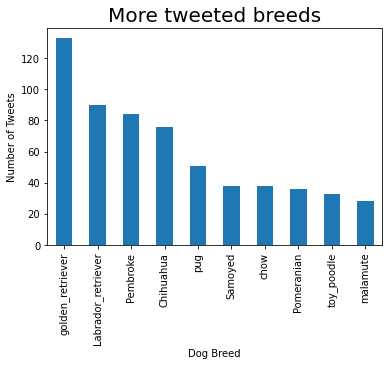

In [162]:
# We plot a bar chart to see the results

master_df['p1'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("More tweeted breeds",fontsize=20)
plt.ylabel("Number of Tweets")
plt.xlabel("Dog Breed");

In [166]:
# 2. The more frequent dog stage
master_df.dog_stage.value_counts()

pupper     142
doggo       48
puppo       20
floofer      8
Name: dog_stage, dtype: int64

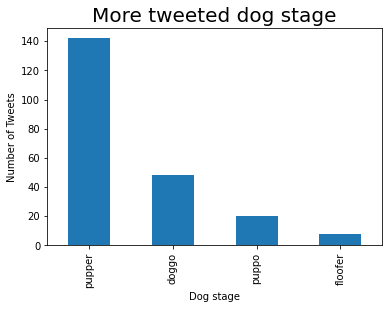

In [167]:
master_df['dog_stage'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("More tweeted dog stage",fontsize=20)
plt.ylabel("Number of Tweets")
plt.xlabel("Dog stage");

In [163]:
# 3. Main source of tweets:
master_df.source.value_counts().nlargest()

Twitter for iPhone    1368
Twitter Web Client      16
TweetDeck                7
Name: source, dtype: int64

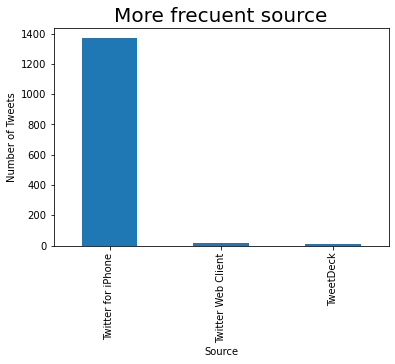

In [164]:
master_df['source'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("More frecuent source",fontsize=20)
plt.ylabel("Number of Tweets")
plt.xlabel("Source");

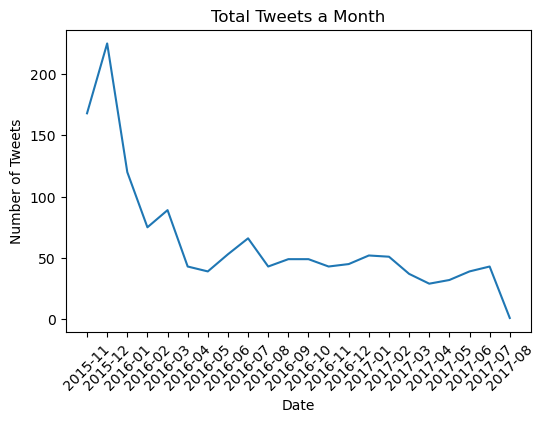

In [165]:

# 4. Number of tweets by month and year

master_df['year_month_date'] = master_df['timestamp'].dt.year.astype(str) + '-' + \
                                            master_df['timestamp'].dt.month.astype(str).str.pad(2, fillchar='0')
master_df['is_tweet'] = np.where(master_df.tweet_id.notnull(), 1, 0)

monthly_tweets = master_df.groupby('year_month_date').is_tweet.sum().reset_index()

plt.figure(dpi=100);
plt.xticks(rotation=45);

ax = sns.lineplot(x='year_month_date', y='is_tweet', data=monthly_tweets);
ax.set_title('Total Tweets a Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');